# Computer Vision (Image operators and filters)

By the end of this lab, you will get hands on experience working with:

*   Image Handling
*   Image Manipulation
*   Histogram and Histogram Equalization
*   Basic filtering techniques

<!-- ### **Remember this is a graded exercise.** -->

**Reminder**:

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Add sufficient comments and explanations wherever necessary.

---


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)

import numpy as np
from matplotlib import pyplot as plt
from skimage import data, exposure, filters, io, morphology
from PIL import Image
from numpy import asarray
from matplotlib import image


# Channels and color spaces

### **Exercise: Image Creation and Color Manipulation**

*   Create a 100 x 100 image for each of the below visualization

![image.png](attachment:image.png)

*   Visualize the created images in a 1 x 3 subplot using matplotlib.


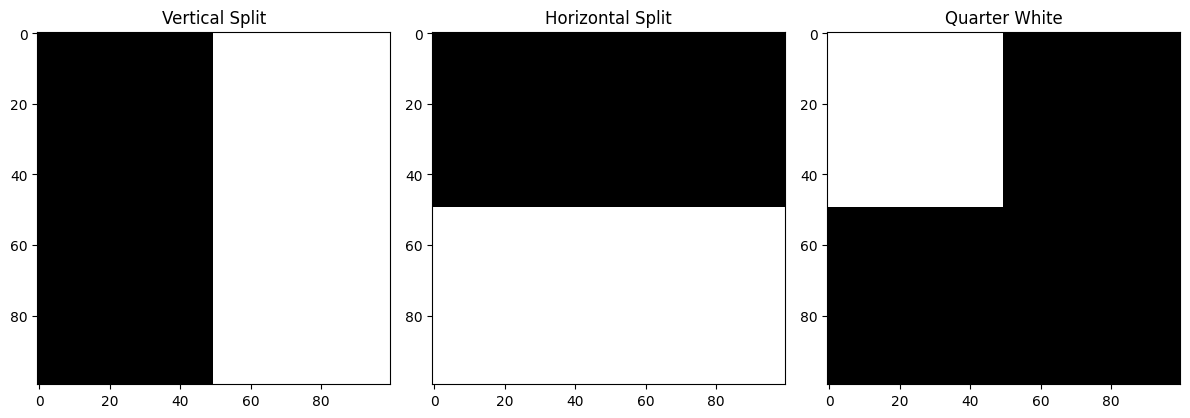

In [ ]:
# Create the black and white images
#virtical
image1 = np.zeros((100, 100))
image1[:, 50:] = 1

#horizantal
image2 = np.zeros((100, 100))
image2[50:, :] = 1

#Quarter
image3 = np.zeros((100, 100))
image3[:50, :50] = 1

# Visualize the created images in a 1 x 3 subplot using matplotlib.
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(image1, cmap='gray')
axes[0].set_title("Vertical Split")
#axes[0].axis('off')

axes[1].imshow(image2, cmap='gray')
axes[1].set_title("Horizontal Split")
#axes[1].axis('off')

axes[2].imshow(image3, cmap='gray')
axes[2].set_title("Quarter White")
#axes[2].axis('off')

plt.tight_layout()
plt.show()




*   Use the above three images to create the following image

![image-2.png](attachment:image-2.png)
*Hint: Remember channels and color spaces*

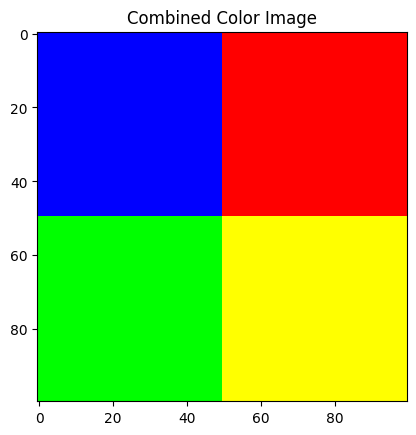

In [ ]:
color_image = np.zeros((100, 100, 3))
#[ R  G  B]
color_image[:50, :50] = [0, 0, 1]  # Blue
color_image[:50, 50:] = [1, 0, 0]  # Red
color_image[50:, :50] = [0, 1, 0]  # Green
color_image[50:, 50:] = [1, 1, 0]  # Yellow (Red + Green)

# Visualize the color image
plt.imshow(color_image)
plt.title("Combined Color Image")
plt.show()

### **Exercise: Color Manipulation**

*   Read the image 'sillas.jpg' from the images folder

![image.png](attachment:image.png)

*   Extract individual channels and plot them using matplotlib subplot.



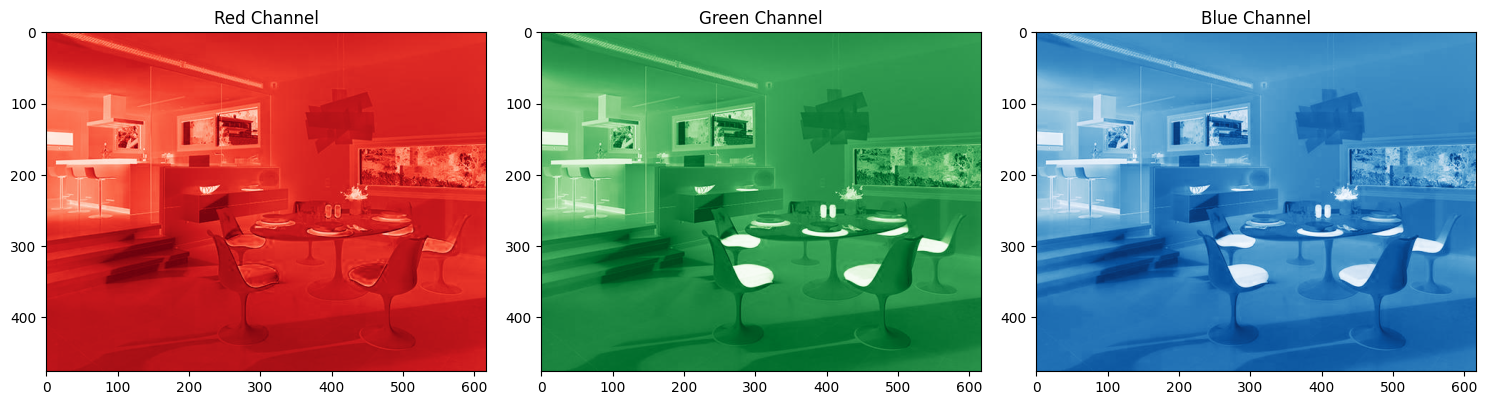

In [ ]:
path = '/content/drive/MyDrive/lab-computer-vision/images/sillas.jpg'
image = io.imread(path)
image_array = asarray(image)

# Extract color channels
red_channel = image_array[:, :, 0]
green_channel = image_array[:, :, 1]
blue_channel = image_array[:, :, 2]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(red_channel, cmap='Reds')
axes[0].set_title("Red Channel")


axes[1].imshow(green_channel, cmap='Greens')
axes[1].set_title("Green Channel")


axes[2].imshow(blue_channel, cmap='Blues')
axes[2].set_title("Blue Channel")


plt.tight_layout()
plt.show()



*   The color **red** looks too bright for the eyes. Isn't it?? Lets change the color and see how it appears.
    *    Create a new image where everything that is **'red' is changed to 'blue'**.
*   Visualize the original image and the created image using matplotlib subplot.

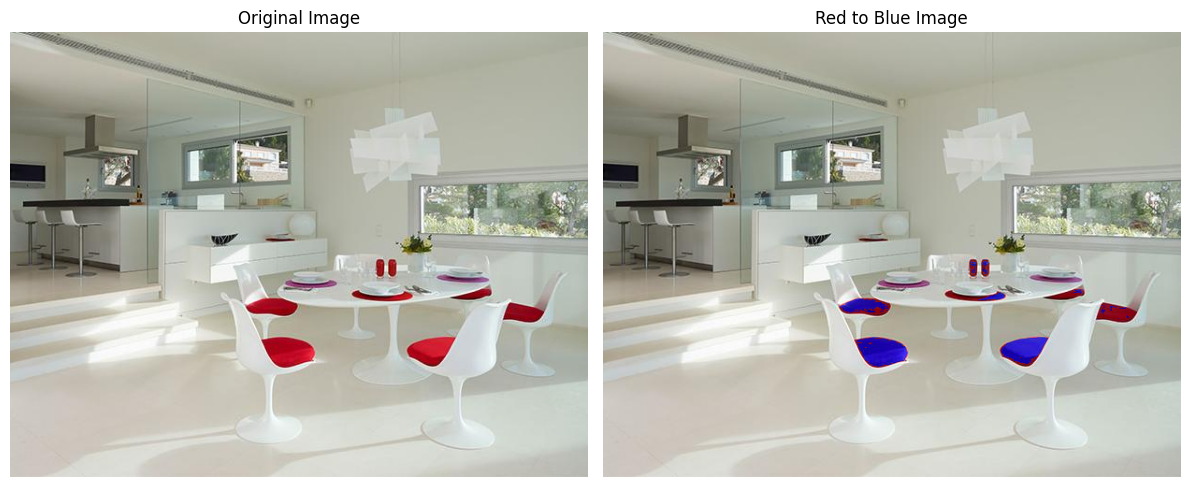

In [ ]:
image_array_copy = image_array.copy()
red_mask = (image_array_copy[:, :, 0] > 150) & (image_array_copy[:, :, 1] < 100) & (image_array_copy[:, :, 2] < 100)

# Swap red channel with blue
image_array_copy[red_mask, 0], image_array_copy[red_mask, 2] = image_array_copy[red_mask, 2], image_array_copy[red_mask, 0]

# Visualize original and modified image
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(image_array)
axes[0].set_title("Original Image")
axes[0].axis('off')

axes[1].imshow(image_array_copy)
axes[1].set_title("Red to Blue Image")
axes[1].axis('off')

plt.tight_layout()
plt.show()





# Image Manipulation

### **Exercise: Image Operators**

*   You can find images 'model.png' and 'coat.png' in the images folder (First two images of the below visualization). Your task is to create an image from the given two images such a way that the model is wearing the coat (Third image in the visualization).
*   You can also find different textures in the images folder. Your task is to change the coat texture to any one of the given textures.
*   Visualize the images similar to the given visualization.

*Hint: Think masks!!!*

![image.png](attachment:image.png)

In [ ]:
! pip install opencv-python

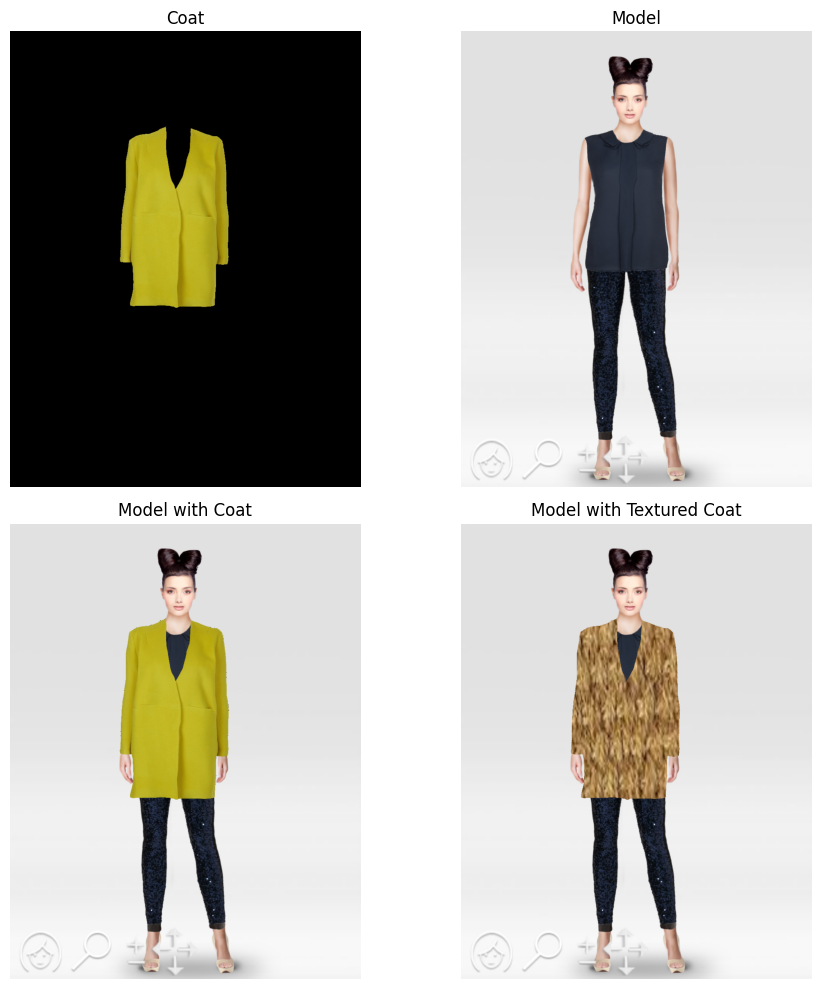

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load images using OpenCV
path1 = '/content/drive/MyDrive/lab-computer-vision/images/model.png'
path2 = '/content/drive/MyDrive/lab-computer-vision/images/coat.png'
path3 = '/content/drive/MyDrive/lab-computer-vision/images/texture.png'

# Read images
model = cv2.imread(path1)
coat = cv2.imread(path2)
texture = cv2.imread(path3)

# Ensure all images are in the same color space (3 channels)
if model.shape[2] == 4:  # If model has an alpha channel
    model = cv2.cvtColor(model, cv2.COLOR_BGRA2BGR)
if coat.shape[2] == 4:  # If coat has an alpha channel
    coat = cv2.cvtColor(coat, cv2.COLOR_BGRA2BGR)
if texture.shape[2] == 4:  # If texture has an alpha channel
    texture = cv2.cvtColor(texture, cv2.COLOR_BGRA2BGR)

# Convert coat to grayscale
gray_coat = cv2.cvtColor(coat, cv2.COLOR_BGR2GRAY)

# Create a binary mask where the coat exists
_, coat_mask = cv2.threshold(gray_coat, 1, 255, cv2.THRESH_BINARY)

# Invert the mask to remove coat area from the model
inverse_mask = cv2.bitwise_not(coat_mask)

# Resize coat and texture images to match model dimensions
coat_resized = cv2.resize(coat, (model.shape[1], model.shape[0]))
texture_resized = cv2.resize(texture, (coat_resized.shape[1], coat_resized.shape[0]))
coat_mask_resized = cv2.resize(coat_mask, (model.shape[1], model.shape[0]))
inverse_mask_resized = cv2.resize(inverse_mask, (model.shape[1], model.shape[0]))

# Extract the coat region from the coat image
coat_region = cv2.bitwise_and(coat_resized, coat_resized, mask=coat_mask_resized)

# Apply the texture to the coat area (replace the white background with the texture)
texture_region = cv2.bitwise_and(texture_resized, texture_resized, mask=coat_mask_resized)

# Combine the model and the coat (model image where coat is applied)
model_background = cv2.bitwise_and(model, model, mask=inverse_mask_resized)
model_with_coat = cv2.add(model_background, coat_region)  # Model with coat

# Combine the model and the texture (model image where textured coat is applied)
model_with_textured_coat = cv2.add(model_background, texture_region)  # Model with textured coat

# Display the images
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Display coat image
axes[0, 0].imshow(cv2.cvtColor(coat_resized, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title("Coat")
axes[0, 0].axis("off")

# Display model image
axes[0, 1].imshow(cv2.cvtColor(model, cv2.COLOR_BGR2RGB))
axes[0, 1].set_title("Model")
axes[0, 1].axis("off")

# Display model with coat
axes[1, 0].imshow(cv2.cvtColor(model_with_coat, cv2.COLOR_BGR2RGB))
axes[1, 0].set_title("Model with Coat")
axes[1, 0].axis("off")

# Display model with textured coat
axes[1, 1].imshow(cv2.cvtColor(model_with_textured_coat, cv2.COLOR_BGR2RGB))
axes[1, 1].set_title("Model with Textured Coat")
axes[1, 1].axis("off")

plt.tight_layout()
plt.show()


# Contrast Enhancement

### **Exercise: Histogram Computation**

*   Read the **'astronaut' image** from data module.
*   Convert the image to grayscale.
*   Compute the **histogram of the image.** *Hint: histogram function is available in skimage.exposure package*
*   Plot the histogram using matplotlib plot.




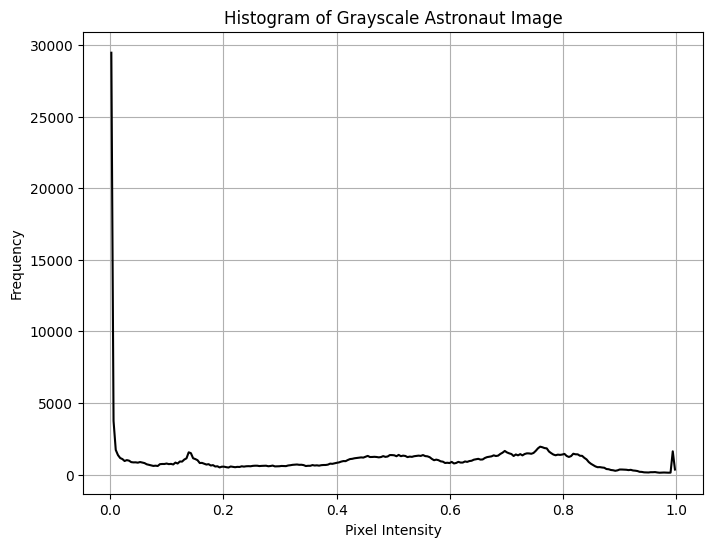

In [ ]:
import matplotlib.pyplot as plt
from skimage import data, color
from skimage.exposure import histogram

# Read the astronaut image from skimage's data module
astronaut = data.astronaut()

# Convert the image to grayscale
astronaut_gray = color.rgb2gray(astronaut)

# Compute the histogram of the grayscale image
hist, bin_centers = histogram(astronaut_gray)

# Plot the histogram using matplotlib
plt.figure(figsize=(8, 6))
plt.plot(bin_centers, hist, color='black')
plt.title("Histogram of Grayscale Astronaut Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


*   Change the bin count to 8 and compute the histogram of the image and plot the computed histogram using matplotlib plot.

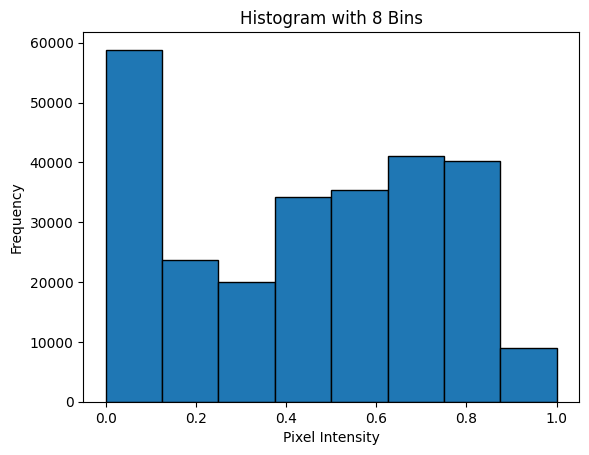

In [ ]:

# Read the astronaut image from skimage's data module
astronaut = data.astronaut()

# Convert the image to grayscale
astronaut_gray = color.rgb2gray(astronaut)



# Compute histogram with 8 bins
plt.hist(astronaut_gray.ravel(), bins=8,  edgecolor='black')

# Customize plot
plt.title("Histogram with 8 Bins")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()



*   What happens when you change the bin count? Does your inference change based on the bin count? If yes, then how do you define the correct bin count.
*   What happens when the bin count is very low and what happens when it is very high?



**Solution**

*(Double-click or enter to edit)*

...


*   Compute histogram of the color image (without converting it to grayscale).
*   Plot the total histogram and also histogram for each channel (show it in a single plot with differnt legends for each histogram).


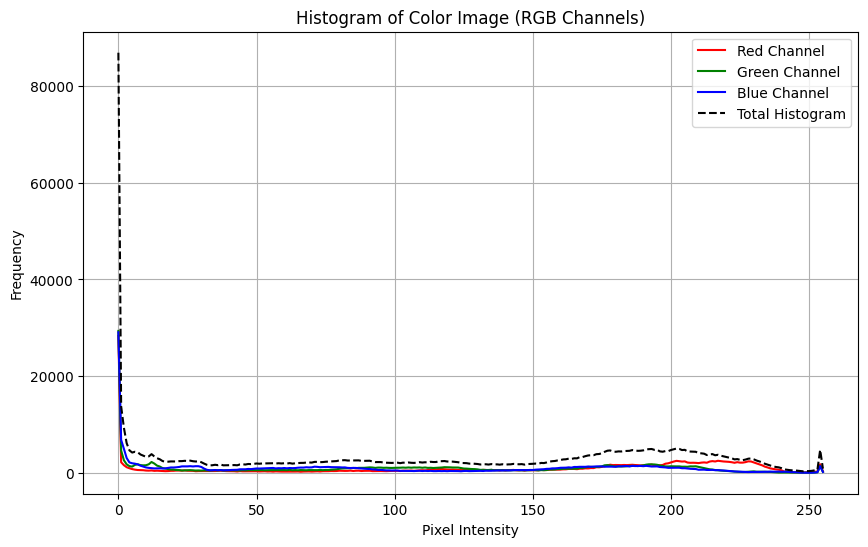

In [ ]:
import matplotlib.pyplot as plt
from skimage import data

# Read the astronaut image from skimage's data module
astronaut = data.astronaut()

# Compute histograms for each channel
hist_r, bin_edges_r = np.histogram(astronaut[:, :, 0].ravel(), bins=256, range=(0, 256))
hist_g, bin_edges_g = np.histogram(astronaut[:, :, 1].ravel(), bins=256, range=(0, 256))
hist_b, bin_edges_b = np.histogram(astronaut[:, :, 2].ravel(), bins=256, range=(0, 256))

# Plot the histograms
plt.figure(figsize=(10, 6))
plt.plot(bin_edges_r[:-1], hist_r, color='red', label='Red Channel')
plt.plot(bin_edges_g[:-1], hist_g, color='green', label='Green Channel')
plt.plot(bin_edges_b[:-1], hist_b, color='blue', label='Blue Channel')

# Plot the total histogram (sum of all channels)
total_hist = hist_r + hist_g + hist_b
plt.plot(bin_edges_r[:-1], total_hist, color='black', linestyle='--', label='Total Histogram')

# Add labels, title, and legend
plt.title("Histogram of Color Image (RGB Channels)")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

### **Exercise: Histogram Equalization**

*   Read 'aquatermi_lowcontrast.jpg' image from the images folder.
*   Compute the histogram of the image.
*   Perform histogram equalization of the image to enhance the contrast. *Hint: Use equalize_hist function available in skimage.exposure*
*   Also compute histogram of the equalized image.
*   Use 2 x 2 subplot to show the original image and the enhanced image along with the corresponding histograms.



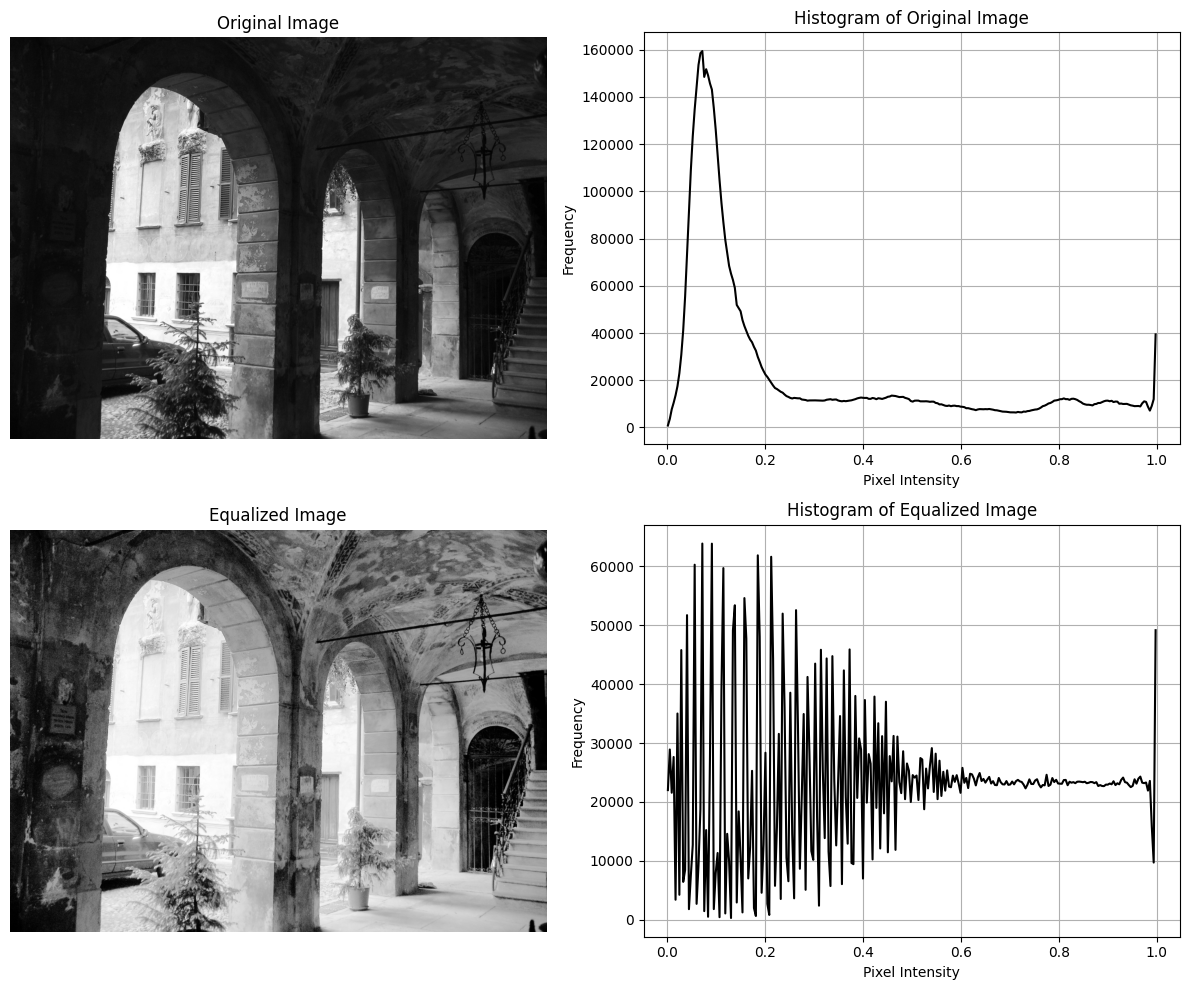

In [ ]:

from skimage import io, exposure
from skimage.color import rgb2gray

# Read the image
path = '/content/drive/MyDrive/lab-computer-vision/images/aquatermi_lowcontrast.jpg'
image = io.imread(path)

# Convert the image to grayscale (if it's a color image)
image_gray = rgb2gray(image)

# Compute the histogram of the original image
hist_original, bin_edges_original = exposure.histogram(image_gray, nbins=256)

# Perform histogram equalization
image_equalized = exposure.equalize_hist(image_gray)

# Compute the histogram of the equalized image
hist_equalized, bin_edges_equalized = exposure.histogram(image_equalized, nbins=256)

# Create a 2x2 subplot
plt.figure(figsize=(12, 10))

# Plot the original image
plt.subplot(2, 2, 1)
plt.imshow(image_gray, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Plot the histogram of the original image
plt.subplot(2, 2, 2)
plt.plot(bin_edges_original, hist_original, color='black')
plt.title("Histogram of Original Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.grid(True)

# Plot the equalized image
plt.subplot(2, 2, 3)
plt.imshow(image_equalized, cmap='gray')
plt.title("Equalized Image")
plt.axis('off')

# Plot the histogram of the equalized image
plt.subplot(2, 2, 4)
plt.plot(bin_edges_equalized, hist_equalized, color='black')
plt.title("Histogram of Equalized Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.grid(True)

# Display the subplots
plt.tight_layout()
plt.show()


*   The above function in skimage.exposure uses cdf and interpolation technique to normalize the histogram. How is it different from linear contrast stretch?


**Solution**

*(Double-click or enter to edit)*

...

### **Exercise: Linear Contrast Stretch**

*   Write a function to compute the linear contrast stretch (Do not use an inbuilt function).
*   Provide grayscale image array and bin count as parameters to the function and return the enhanced image array.
*   Use a 2 x 2 plot to visualize the original image, histogram, enhanced image and the corresponding histogram.



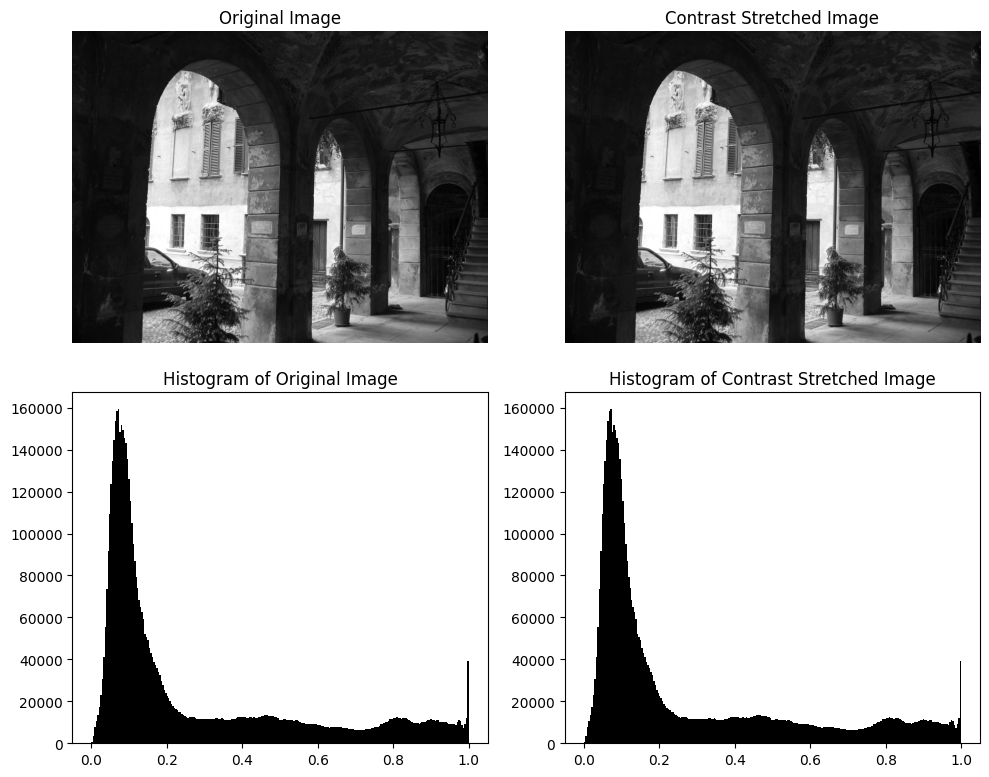

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import io, color

# Function to perform linear contrast stretch
def contrast_stretch(image, min_out=0, max_out=1):
    min_in, max_in = np.min(image), np.max(image)
    stretched = (image - min_in) * ((max_out - min_out) / (max_in - min_in)) + min_out
    return stretched

# Read the image
path = '/content/drive/MyDrive/lab-computer-vision/images/aquatermi_lowcontrast.jpg'
image = io.imread(path)

# Convert the image to grayscale
gray_image = color.rgb2gray(image)

# Apply Linear Contrast Stretch
stretched_image = contrast_stretch(gray_image)

# Compute histograms
hist_original, _ = np.histogram(gray_image, bins=256, range=[0, 1])
hist_stretched, _ = np.histogram(stretched_image, bins=256, range=[0, 1])


fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Plot the original image
axes[0, 0].imshow(gray_image, cmap="gray")
axes[0, 0].set_title("Original Image")
axes[0, 0].axis("off")

# Plot the contrast-stretched image
axes[0, 1].imshow(stretched_image, cmap="gray")
axes[0, 1].set_title("Contrast Stretched Image")
axes[0, 1].axis("off")

# Plot the histogram of the original image
axes[1, 0].hist(gray_image.ravel(), bins=256, color="black")
axes[1, 0].set_title("Histogram of Original Image")

# Plot the histogram of the stretched image
axes[1, 1].hist(stretched_image.ravel(), bins=256, color="black")
axes[1, 1].set_title("Histogram of Contrast Stretched Image")

# Display the subplots
plt.tight_layout()
plt.show()

# Filters

### **Exercise: Mean Filter**

*   Load the **coins** image from the data module.
*   Define a disk structuring element (selem) of radius 20. *Hint: Structuring elements are defined in the skimage.morphology module*
*   Use mean filter using the created selem. *Hint: The mean filter is available in skimage.filters.rank module*
*   Increase the radius of the selem by 10 and apply the mean filter.
*   Reduce the radius of the selem by 10 and apply the mean filter.
*   Visualize all the smoothened images along with the original image.




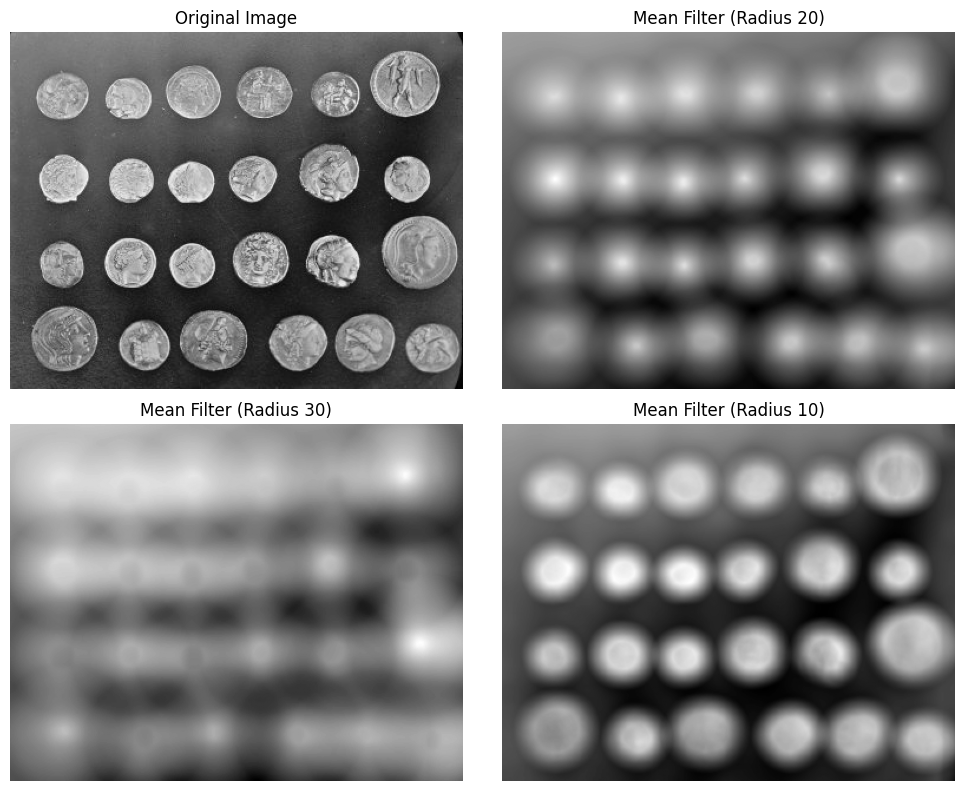

In [ ]:
from skimage import data, filters
from skimage.morphology import disk

# Load the coins image
coins = data.coins()

# Define disk structuring elements with different radii
selem_radius_20 = disk(20)  # Radius 20
selem_radius_30 = disk(30)  # Radius 30 (increased by 10)
selem_radius_10 = disk(10)  # Radius 10 (reduced by 10)

# Apply mean filter with different structuring elements
mean_filtered_20 = filters.rank.mean(coins, selem_radius_20)
mean_filtered_30 = filters.rank.mean(coins, selem_radius_30)
mean_filtered_10 = filters.rank.mean(coins, selem_radius_10)

# Create a 2x2 subplot for visualization
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Plot the original image
axes[0, 0].imshow(coins, cmap='gray')
axes[0, 0].set_title("Original Image")
axes[0, 0].axis('off')

# Plot the image filtered with radius 20
axes[0, 1].imshow(mean_filtered_20, cmap='gray')
axes[0, 1].set_title("Mean Filter (Radius 20)")
axes[0, 1].axis('off')

# Plot the image filtered with radius 30
axes[1, 0].imshow(mean_filtered_30, cmap='gray')
axes[1, 0].set_title("Mean Filter (Radius 30)")
axes[1, 0].axis('off')

# Plot the image filtered with radius 10
axes[1, 1].imshow(mean_filtered_10, cmap='gray')
axes[1, 1].set_title("Mean Filter (Radius 10)")
axes[1, 1].axis('off')

# Display the subplots
plt.tight_layout()
plt.show()

*   Use different selem (square, rectangle, star, diamond) to view the behaviour of the mean filter (It is not necessary to repeat with different sizes; it is sufficient to show the one with optimal parameter).
*   Create a 2 x n subplot to show the selem in the first row and the corresponding smoothened image in the second row.

<ipython-input-40-3d3ab4fa60f6>:7: FutureWarning: `square` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  selem_square = square(20)  # Square of size 20x20
<ipython-input-40-3d3ab4fa60f6>:8: FutureWarning: `rectangle` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  selem_rectangle = rectangle(30, 10)  # Rectangle of size 30x10


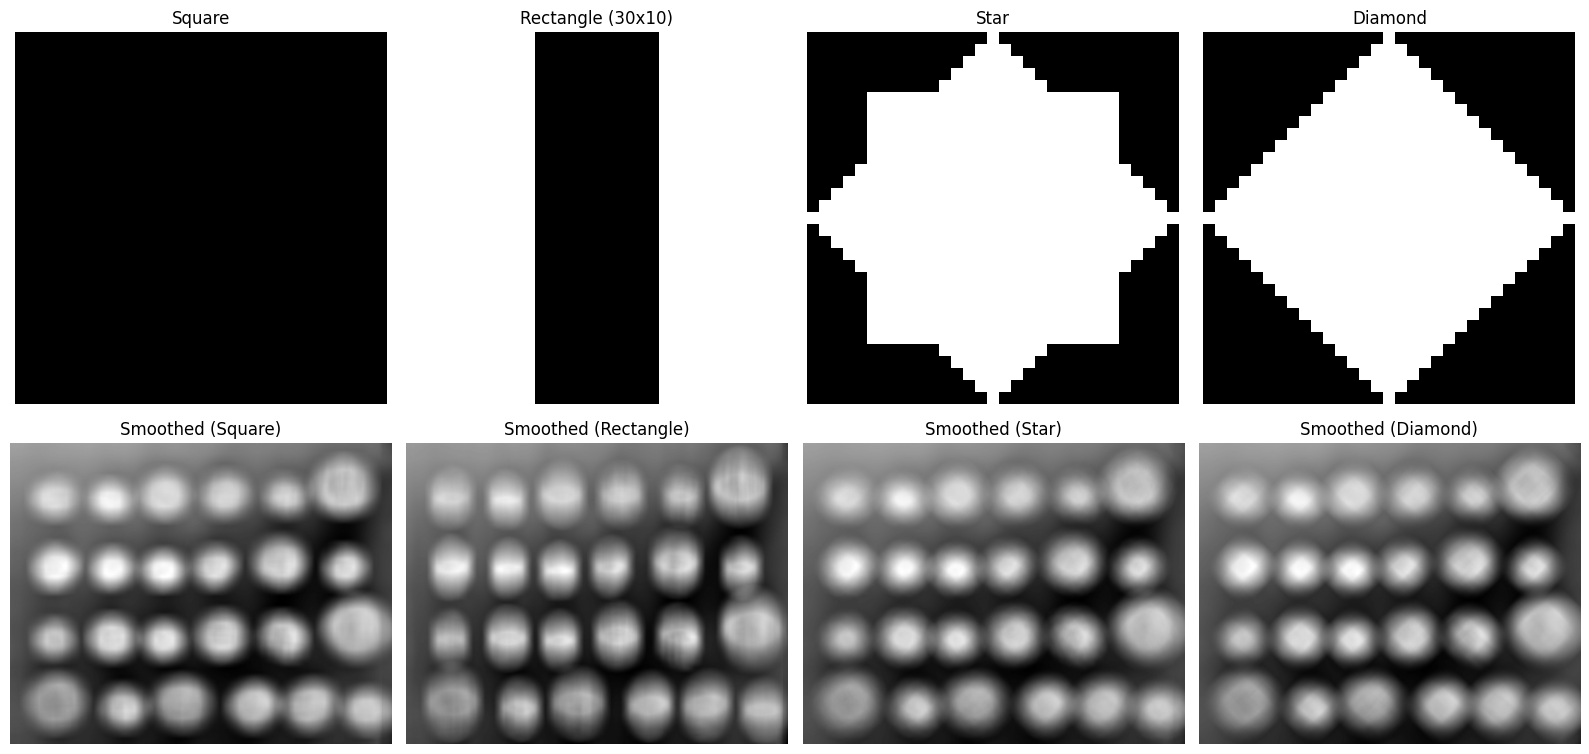

In [ ]:
from skimage.morphology import square, rectangle, star, diamond

# Load the coins image
coins = data.coins()

# Define different structuring elements
selem_square = square(20)  # Square of size 20x20
selem_rectangle = rectangle(30, 10)  # Rectangle of size 30x10
selem_star = star(10)  # Star with radius 10
selem_diamond = diamond(15)  # Diamond with radius 15

# Apply mean filter with different structuring elements
mean_filtered_square = filters.rank.mean(coins, selem_square)
mean_filtered_rectangle = filters.rank.mean(coins, selem_rectangle)
mean_filtered_star = filters.rank.mean(coins, selem_star)
mean_filtered_diamond = filters.rank.mean(coins, selem_diamond)

# Create a 2x4 subplot for visualization
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

# Plot the structuring elements in the first row
axes[0, 0].imshow(selem_square, cmap='gray')
axes[0, 0].set_title("Square")
axes[0, 0].axis('off')

axes[0, 1].imshow(selem_rectangle, cmap='gray')
axes[0, 1].set_title("Rectangle (30x10)")
axes[0, 1].axis('off')

axes[0, 2].imshow(selem_star, cmap='gray')
axes[0, 2].set_title("Star")
axes[0, 2].axis('off')

axes[0, 3].imshow(selem_diamond, cmap='gray')
axes[0, 3].set_title("Diamond")
axes[0, 3].axis('off')

# Plot the corresponding smoothed images in the second row
axes[1, 0].imshow(mean_filtered_square, cmap='gray')
axes[1, 0].set_title("Smoothed (Square)")
axes[1, 0].axis('off')

axes[1, 1].imshow(mean_filtered_rectangle, cmap='gray')
axes[1, 1].set_title("Smoothed (Rectangle)")
axes[1, 1].axis('off')

axes[1, 2].imshow(mean_filtered_star, cmap='gray')
axes[1, 2].set_title("Smoothed (Star)")
axes[1, 2].axis('off')

axes[1, 3].imshow(mean_filtered_diamond, cmap='gray')
axes[1, 3].set_title("Smoothed (Diamond)")
axes[1, 3].axis('off')

# Display the subplots
plt.tight_layout()
plt.show()

*   How does changing the radius of disk affect the smoothing functionality?

**Solution**

*(Double-click or enter to edit)*

...


*   What is the observed behaviour with difference in the structuring element?



**Solution**

*(Double-click or enter to edit)*

...



*   What is the difference between mean filter and gaussian filter?
*   Where do you use mean filters and where do you use gaussian filters?



**Solution**

*(Double-click or enter to edit)*

...